## Load the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

#import image_data_generator for loading and data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Load the dataset

In [2]:
# data generator
# Load images from directory, automatically inferring labels from subfolder names
# Images are resized to 256x256 for consistency
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Normalize the images

In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

## 1. Create the CNN architecture. First with `tanh` activation

In [4]:
## 2x2 maxpooling layer is added after every convolution layer
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 1.1 Compile the model

In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### 1.2 Train the model

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.5592 - loss: 0.7539 - val_accuracy: 0.6585 - val_loss: 0.6262
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.6887 - loss: 0.5918 - val_accuracy: 0.6760 - val_loss: 0.6019
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.7288 - loss: 0.5352 - val_accuracy: 0.6835 - val_loss: 0.5821
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.7637 - loss: 0.4869 - val_accuracy: 0.7070 - val_loss: 0.5604
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8065 - loss: 0.4284 - val_accuracy: 0.7150 - val_loss: 0.5650
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.8313 - loss: 0.3811 - val_accuracy: 0.7195 - val_loss: 0.5632
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.8553 - loss: 0.3432 - val_accuracy: 0.7155 - val_loss: 0.5983
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.8809 - loss: 0

### 1.3 Plot test and validation accuracy

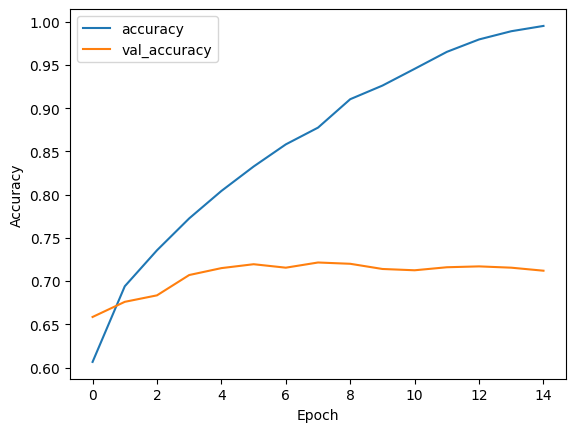

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.4 We observe overfitting. To address this we try early stopping by monitoring the `val_loss`

### 1.4.1 Create the model

In [8]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

### 1.4.2 Compile the model

In [9]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### 1.4.3 Train the model with early stopping criteria

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
history = model.fit(train_dataset, epochs=20, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.5477 - loss: 0.7225 - val_accuracy: 0.6325 - val_loss: 0.6336
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.6584 - loss: 0.6092 - val_accuracy: 0.6775 - val_loss: 0.5964
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.7194 - loss: 0.5514 - val_accuracy: 0.6965 - val_loss: 0.5734
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.7654 - loss: 0.4953 - val_accuracy: 0.6995 - val_loss: 0.5799
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8023 - loss: 0.4408 - val_accuracy: 0.7165 - val_loss: 0.5463
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8356 - loss: 0.3872 - val_accuracy: 0.7155 - val_loss: 0.5664
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.8574 - loss: 0.3427 - val_accuracy: 0.7340 - val_loss: 0.5716
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.8803 - loss: 0

## Problem of overfitting has still not been addressed. Now we try with `ReLU` and data augmentation.

## 2. Model with `ReLU` and data augmentation

### To address the problem of overfitting we perform data augmentation.
### We use Image_Data_Generator

In [11]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For testing images, only normalize pixel values (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator that reads images from the training directory
train_generator = train_datagen.flow_from_directory(
    directory = '/content/dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Create testing data generator that reads images from the testing directory
test_generator = test_datagen.flow_from_directory(
    directory ='/content/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### 2.1 Create the model

In [12]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 2.2 Compile the model with early stopping criteria

In [13]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=100, verbose=1, validation_data = test_generator,callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 219ms/step - accuracy: 0.5340 - loss: 0.6905 - val_accuracy: 0.5125 - val_loss: 0.6871
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.5995 - loss: 0.6596 - val_accuracy: 0.6425 - val_loss: 0.6246
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.6485 - loss: 0.6251 - val_accuracy: 0.7095 - val_loss: 0.5770
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.6809 - loss: 0.6005 - val_accuracy: 0.7110 - val_loss: 0.5570
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.6773 - loss: 0.5897 - val_accuracy: 0.7355 - val_loss: 0.5408
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 211ms/step - accuracy: 0.6826 - loss: 0.5868 - val_accuracy: 0.7360 - val_loss: 0.5277
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.7025 - loss: 0.5660 - val_accuracy: 0.7445 - val_loss: 0.5169
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - accuracy: 0.7044 -

### 2.3 Plot train and validation accuracy

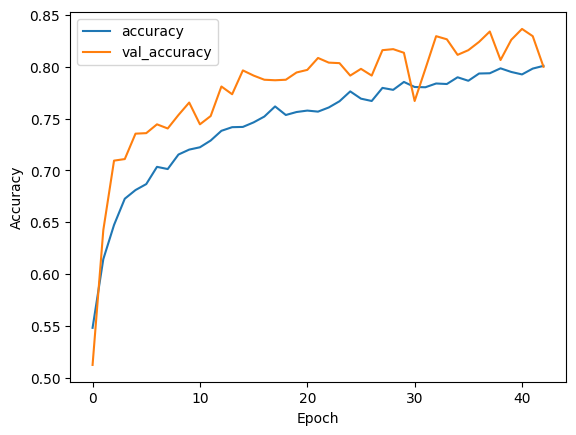

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.4 Plot train and validation loss

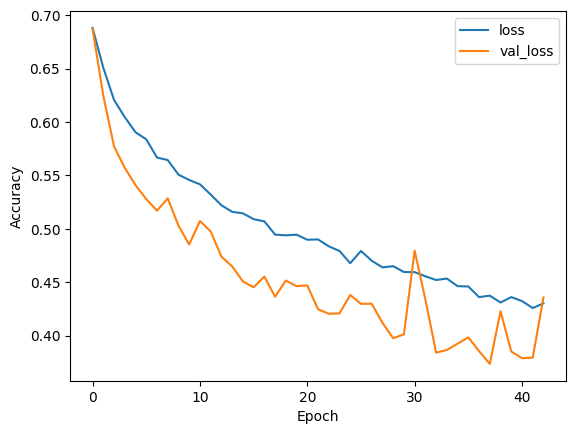

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()